## Question-1:
Find out how to implement a decision tree using Python when the dataset contains ordinal features. Find an example problem/dataset as well.

In [1]:
import sys
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.drop(['Name','PassengerId','Fare','Ticket','Cabin','Embarked','Sex'],axis='columns',inplace=True)

In [4]:
df

,Survived,Pclass,Age,SibSp,Parch
0,0,3,22.0,1,0
1,1,1,38.0,1,0
2,1,3,26.0,0,0
3,1,1,35.0,1,0
4,0,3,35.0,0,0
...,...,...,...,...,...
886,0,2,27.0,0,0
887,1,1,19.0,0,0
888,0,3,NaN,1,2
889,1,1,26.0,0,0


In [5]:
print(df.isnull().sum())

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
dtype: int64


In [6]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [7]:
bins=[0, 18, 35, 60, 100]
labels=['<18', '18-35', '35-60', '60+']
df['AgeBin'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [8]:
# Prepare X and y
X = df[['Pclass', 'AgeBin', 'SibSp', 'Parch']]
y = df['Survived']

In [9]:
# Define category orders
age_cats = ['<18', '18-35', '35-60', '60+']
pclass_cats = [1, 2, 3]
sibsp_cats = sorted(df['SibSp'].unique())
parch_cats = sorted(df['Parch'].unique())

In [10]:
encoder = OrdinalEncoder(categories=[pclass_cats, age_cats, sibsp_cats, parch_cats])
X_enc = encoder.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.3, random_state=42, stratify=y)

In [12]:
model = DecisionTreeClassifier()

In [13]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
acc = model.score(X_test, y_test)
print(f"Test set accuracy: {acc:.4f}")

Test set accuracy: 0.6903


## Question-2:
Implement a fully grown decision tree using Python on the Telecom Churn data.

In [15]:
df1= pd.read_csv("Telco-Customer-Churn.csv")
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [16]:
data = df1.drop('customerID', axis=1)

In [17]:
#Since TotalCharges is object Type (It should have come under quantitative feature), I would change it to numeric data type
data.TotalCharges=pd.to_numeric(data.TotalCharges,errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median())

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [18]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [19]:
# let us drop all rows with any missing value
data.dropna(inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

Categorize the variables in the dataset to create new features for predictive models implementation

1. Tenure range: Categorize the tenure data into 6 groups, including 0-1 year (0-12 months), 1-2 years (13-24 months), 2-3 years (25-36 months), 3-4 years (37-48 months), 4-5 years (49-60 months), and >5 years (>60 months)

2. Total services: Count the total services that the customer receives from the telecommunication company. Services include Phone Service, Multilines Service, Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, and Streaming Movies.

3. Security concerns: Categorize the customer who receives both Online Security and Device Protection.

4. Entertainment concerns: Categorize the customer who receives both Streaming TV and Streaming Movies

5. Technical Support for old people: Categorize the old customer who receives technical support service.

6. Billing and payment comfortable concerns: Categorize the customer who selects paperless billing and electronic check as payment method.

7. Price range: Categorize the monthly charges into 6 groups, including 0-20 dollars, 20-40 dollars, 40-60 dollars, 60-80 dollars, 80-100 dollars, and 100-120 dollars.

In [21]:
implementing_data = data.copy()

In [22]:
# TenureRange
implementing_data['TenureRange'] = pd.cut(
    implementing_data['tenure'],
    bins=[-1, 12, 24, 36, 48, 60, 72],
    labels=['0-1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '>5 years']
)

# TotalServices
service_cols = [
    'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']

implementing_data["TotalServices"] = (
    implementing_data[service_cols]
      .replace({
         'Yes': 1,
         'No': 0,
         'No phone service': 0,
         'No internet service': 0
      })
      .sum(axis=1)
)

# MonthlyChargesRange
implementing_data['MonthlyChargesRange'] = pd.cut(
    implementing_data['MonthlyCharges'],
    bins=[-1, 20, 40, 60, 80, 100, 120],
    labels=[
      'Monthly 0-20$', 'Monthly 20-40$', 'Monthly 40-60$',
      'Monthly 60-80$', 'Monthly 80-100$', 'Monthly 100-120$'
    ]
)

# Security
implementing_data["Security"] = ((implementing_data["OnlineSecurity"] == 'Yes') &(implementing_data["DeviceProtection"] == 'Yes'))

# Entertainment
implementing_data["Entertainment"] = ((implementing_data["StreamingTV"] == 'Yes') &(implementing_data["StreamingMovies"] == 'Yes'))

# SeniorTechSupport
implementing_data["SeniorTechSupport"] = ((implementing_data["SeniorCitizen"] == 1) &(implementing_data["TechSupport"] == 'Yes'))

# BillingAndPayment
implementing_data["BillingAndPayment"] = ((implementing_data["PaperlessBilling"] == 'Yes') &(implementing_data["PaymentMethod"] == 'Electronic check'))


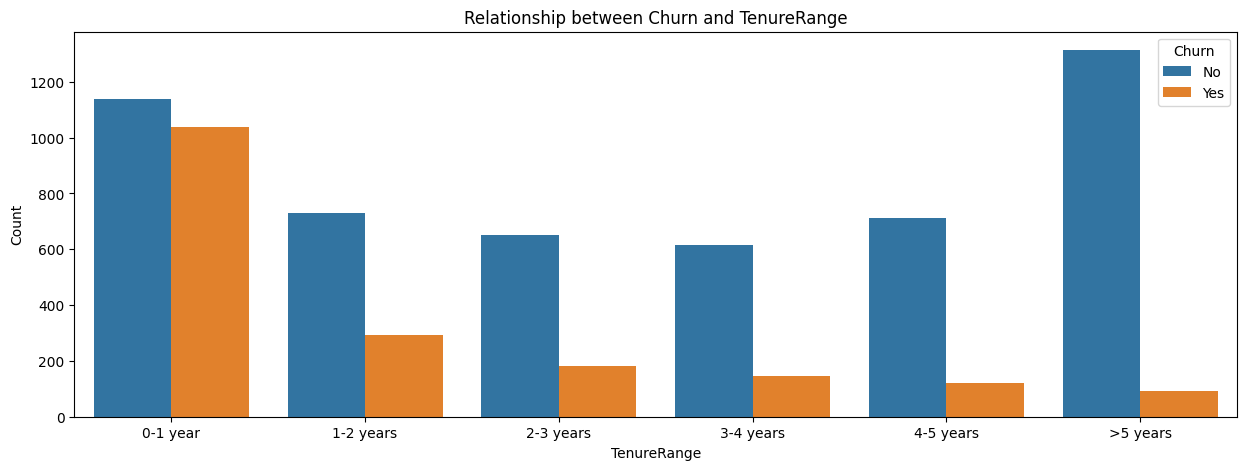

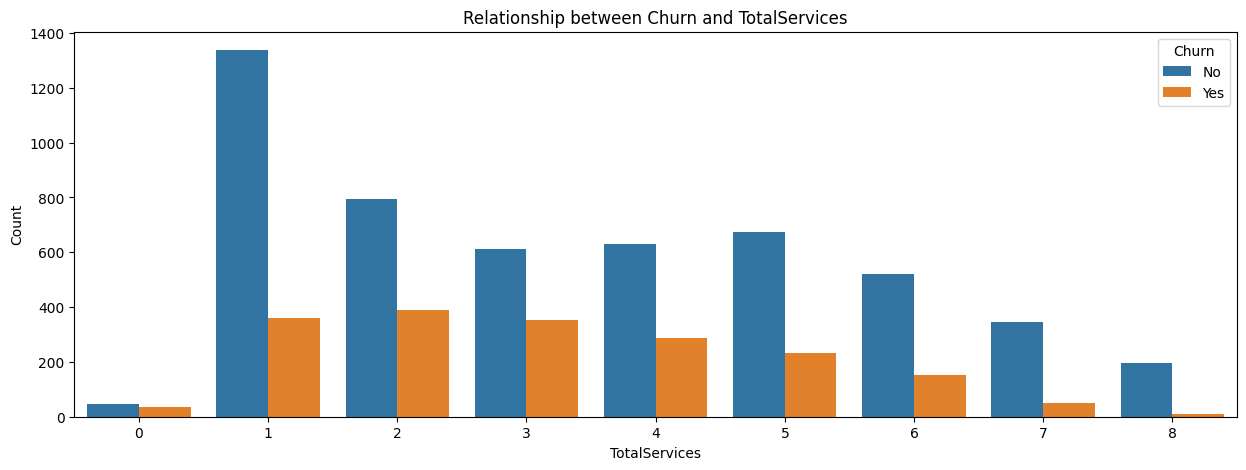

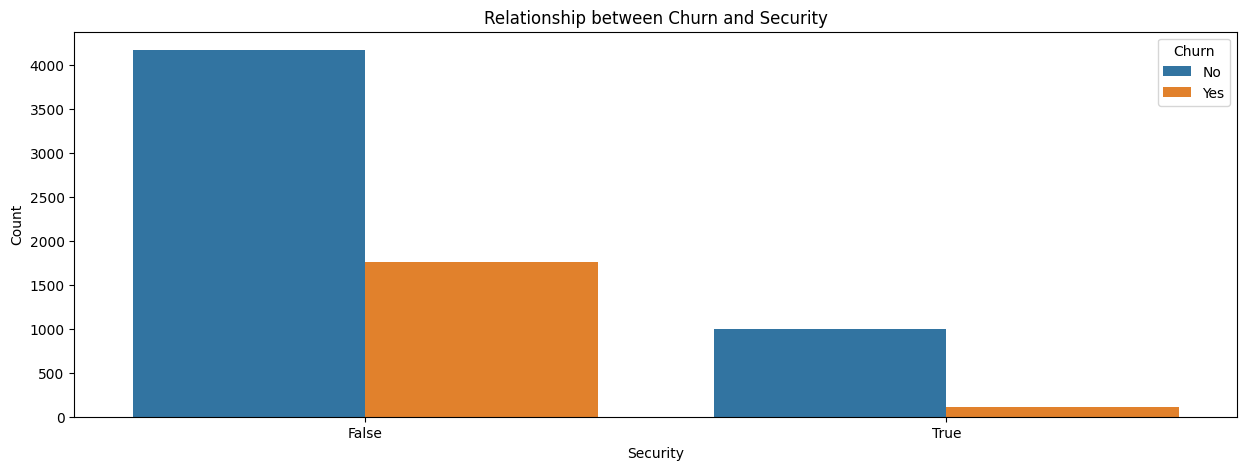

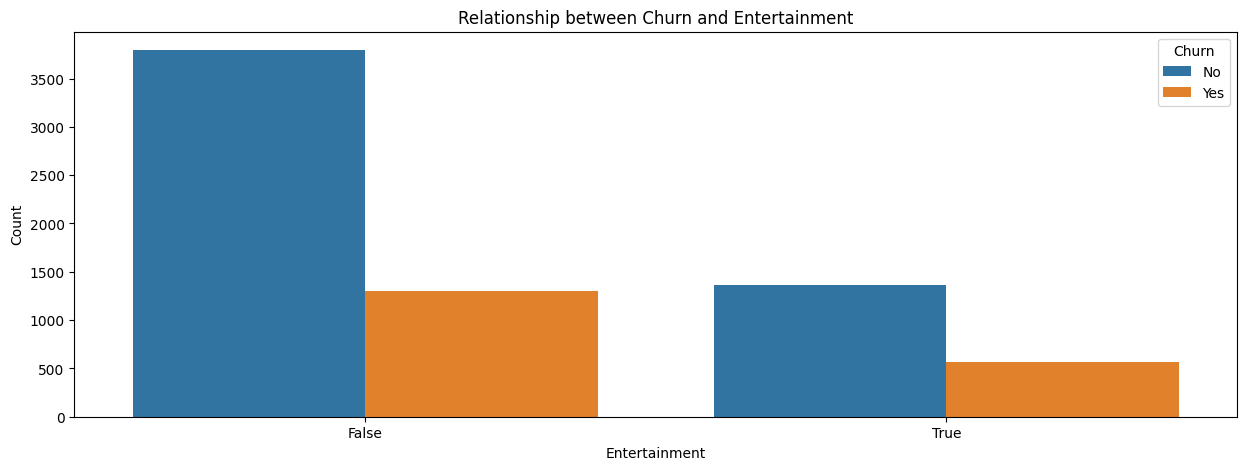

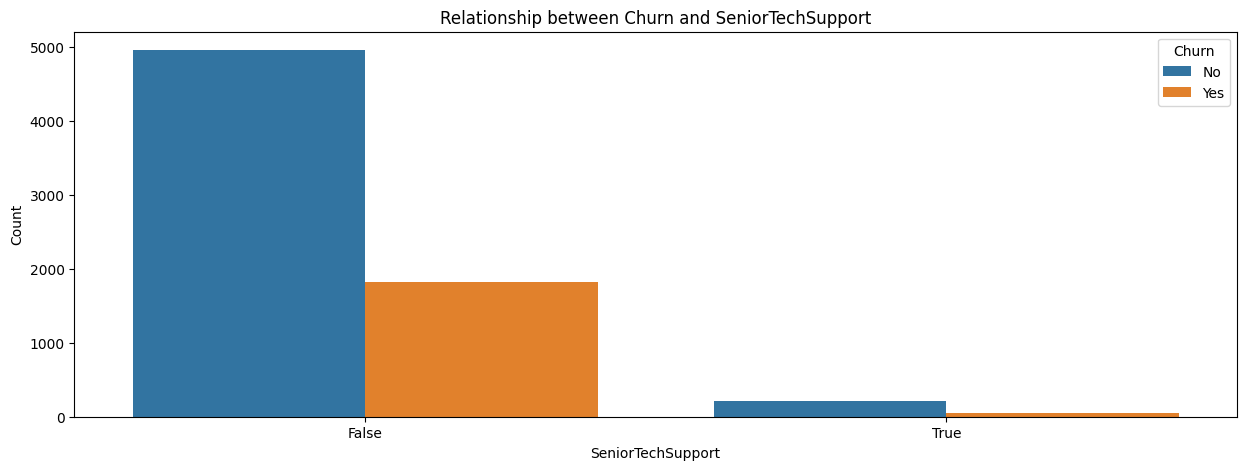

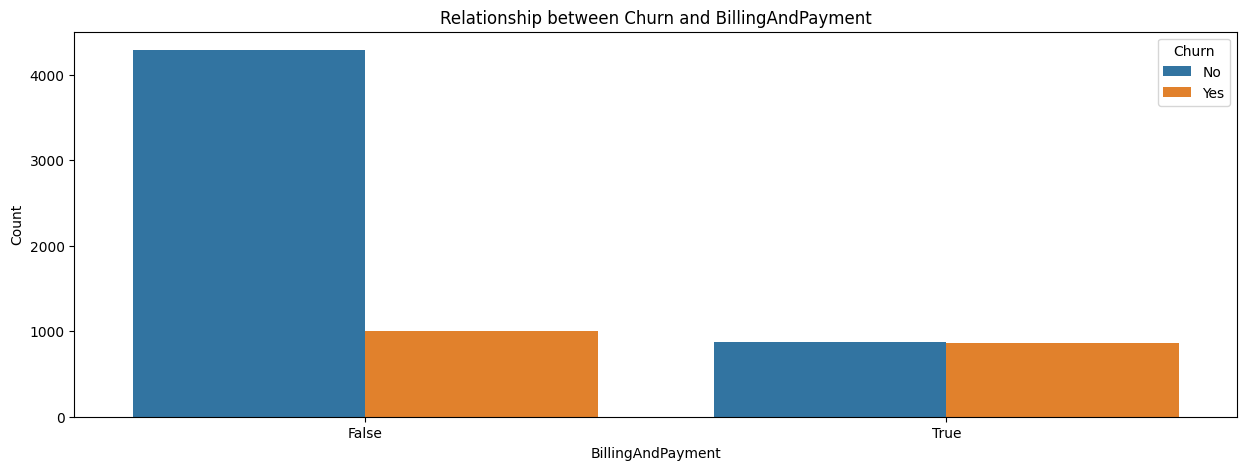

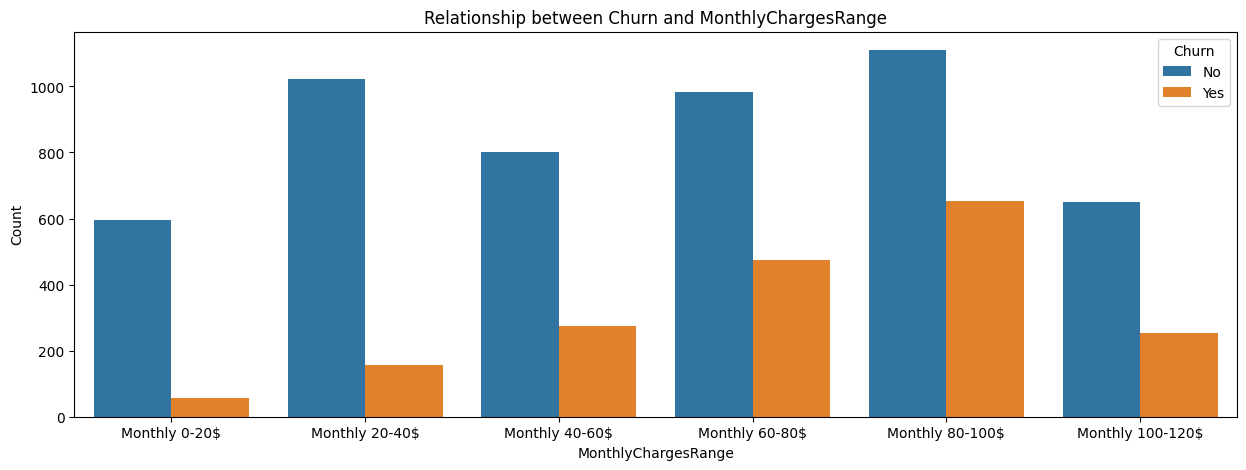

In [23]:
new_features_columns = ["TenureRange", "TotalServices", "Security", "Entertainment", "SeniorTechSupport", "BillingAndPayment", "MonthlyChargesRange"]

for col in new_features_columns:
    plt.figure(figsize=(15, 5))
    sns.countplot(x=col, hue="Churn", data=implementing_data)
    plt.title(f"Relationship between Churn and {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [24]:
# Convert all values into numerical term
train_data = implementing_data.copy()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gender               7032 non-null   object  
 1   SeniorCitizen        7032 non-null   int64   
 2   Partner              7032 non-null   object  
 3   Dependents           7032 non-null   object  
 4   tenure               7032 non-null   int64   
 5   PhoneService         7032 non-null   object  
 6   MultipleLines        7032 non-null   object  
 7   InternetService      7032 non-null   object  
 8   OnlineSecurity       7032 non-null   object  
 9   OnlineBackup         7032 non-null   object  
 10  DeviceProtection     7032 non-null   object  
 11  TechSupport          7032 non-null   object  
 12  StreamingTV          7032 non-null   object  
 13  StreamingMovies      7032 non-null   object  
 14  Contract             7032 non-null   object  
 15  PaperlessBilling     7032 

In [41]:
# Convert all values into numerical term

# Convert columns that contain 2 categories
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
bi_group_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
                    'Churn', 'Security', 'Entertainment', 'SeniorTechSupport', 'BillingAndPayment']
for col in bi_group_columns:
    train_data[col] = encoder.fit_transform(train_data[col])

bool_cols = ['Security', 'Entertainment', 'SeniorTechSupport', 'BillingAndPayment']
implementing_data[bool_cols] = implementing_data[bool_cols].astype(int)

# Convert columns that contain multiple categories
multi_group_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaymentMethod', 'TenureRange', 'MonthlyChargesRange']

# Check and encode only existing columns
existing_multi_group_columns = [col for col in multi_group_columns if col in train_data.columns]
train_data = pd.get_dummies(train_data, columns=existing_multi_group_columns, drop_first=True)

In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   PaperlessBilling                       7032 non-null   int64  
 7   MonthlyCharges                         7032 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7032 non-null   int64  
 10  TotalServices                          7032 non-null   int64  
 11  Security 

In [28]:
strain_data = train_data[["InternetService_Fiber optic", "PaymentMethod_Electronic check",
                                  "BillingAndPayment", "MonthlyCharges", "PaperlessBilling", "SeniorCitizen",
                                 "Partner", "Security", "Dependents", "TechSupport_Yes", "OnlineSecurity_Yes",
                                 "Contract_One year", "TotalCharges", "TenureRange_>5 years", "InternetService_No",
                                 "StreamingMovies_No internet service", "StreamingTV_No internet service",
                                 "TechSupport_No internet service", "OnlineBackup_No internet service",
                                 "OnlineSecurity_No internet service", "DeviceProtection_No internet service",
                                 "Contract_Two year", "tenure"]].copy()

bool_cols = strain_data.select_dtypes(include='bool').columns.tolist()

strain_data[bool_cols] = strain_data[bool_cols].astype(int)
strain_data

,InternetService_Fiber optic,PaymentMethod_Electronic check,BillingAndPayment,MonthlyCharges,PaperlessBilling,SeniorCitizen,Partner,Security,Dependents,TechSupport_Yes,...,TenureRange_>5 years,InternetService_No,StreamingMovies_No internet service,StreamingTV_No internet service,TechSupport_No internet service,OnlineBackup_No internet service,OnlineSecurity_No internet service,DeviceProtection_No internet service,Contract_Two year,tenure
0,0,1,1,29.85,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,56.95,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,34
2,0,0,0,53.85,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,42.30,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,45
4,1,1,1,70.70,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,84.80,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,24
7039,1,0,0,103.20,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,72
7040,0,1,1,29.60,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,11
7041,1,0,0,74.40,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [29]:
# Split data
X = strain_data
y = train_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Train Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

print(classification_report(y_test, y_test_pred))


Train score 0.9971556277935798
Test score 0.7246445497630332
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1549
           1       0.48      0.52      0.50       561

    accuracy                           0.72      2110
   macro avg       0.65      0.66      0.65      2110
weighted avg       0.73      0.72      0.73      2110



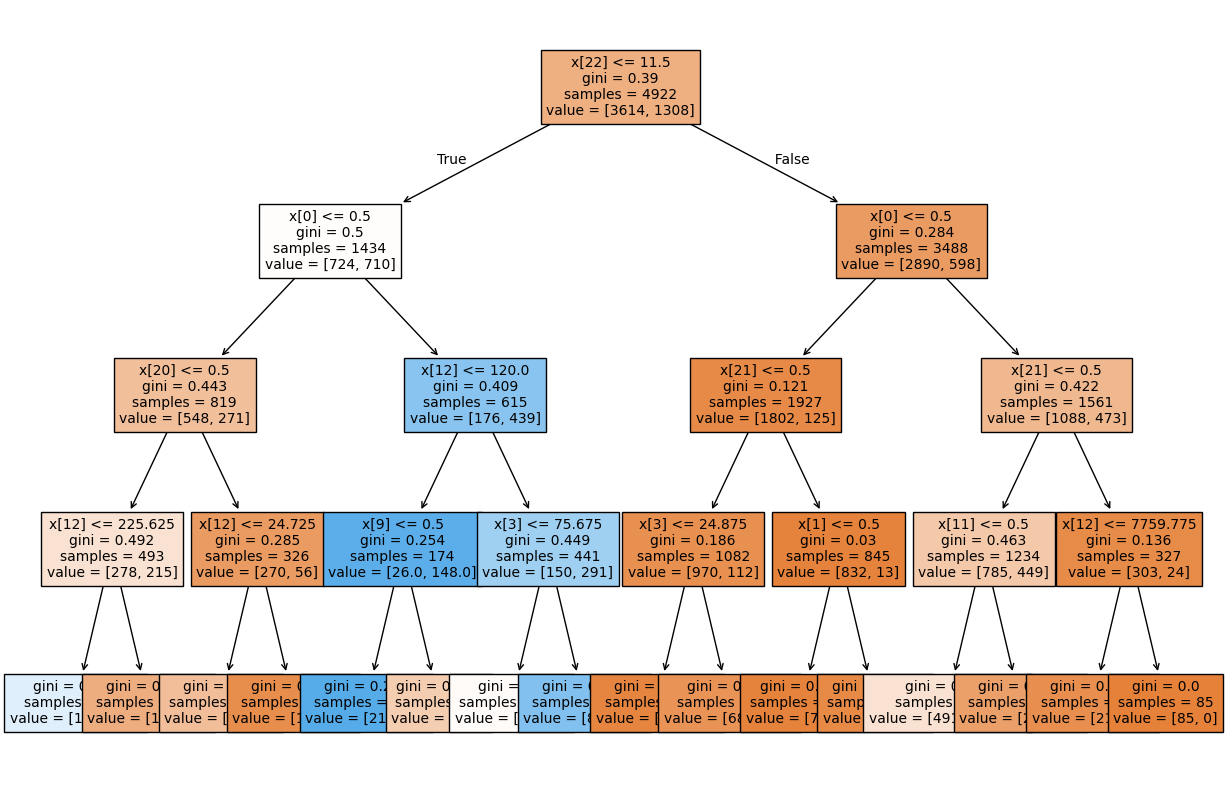

In [30]:
model = DecisionTreeClassifier(random_state=42, max_depth=4)
model.fit(X_train, y_train)
plt.figure(figsize=(15,10))
tree.plot_tree(model, filled=True, fontsize=10)
plt.show()

## Question 3:
Perform (pre and post) pruning on the decision tree obtained in (2). Learn how to find the value of alpha parameter.

In [31]:
# Pre-Pruning: Hyperparameter Tuning & Baseline Accuracy
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],                 
    'splitter': ['best', 'random'],                             
    'max_depth': [2, 4, 6, 8, 10, 12, 15],                   
    'min_samples_split': [2, 3, 5, 8, 10],                          
    'min_samples_leaf': [1, 2, 4, 5, 10]                        
}


gs = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)
gs.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 15],
                         'min_samples_leaf': [1, 2, 4, 5, 10],
                         'min_samples_split': [2, 3, 5, 8, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [32]:
best_tree = gs.best_estimator_
y_tr_pre = best_tree.predict(X_train)
y_te_pre = best_tree.predict(X_test)

pre_train_acc = accuracy_score(y_train, y_tr_pre)
pre_test_acc  = accuracy_score(y_test,  y_te_pre)

print("Pre-Pruned(GridSearch)")
print(f"Best params: {gs.best_params_}")
print(f"Train accuracy: {pre_train_acc:.4f}")
print(f"Test  accuracy: {pre_test_acc:.4f}")

Pre-Pruned(GridSearch)
Best params: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
Train accuracy: 0.8025
Test  accuracy: 0.7872


In [33]:
# Post-Pruning: Cost-Complexity Pruning & Evaluation
# Get pruning path
clf0 = DecisionTreeClassifier(random_state=42)
path = clf0.cost_complexity_pruning_path(X_train, y_train)
alphas = path.ccp_alphas[:-1]

In [34]:
# Train & record accuracies for each alpha
train_acc, test_acc = [], []
for a in alphas:
    dt = DecisionTreeClassifier(random_state=42, ccp_alpha=a)
    dt.fit(X_train, y_train)
    train_acc.append(dt.score(X_train, y_train))
    test_acc.append(dt.score(X_test,  y_test))

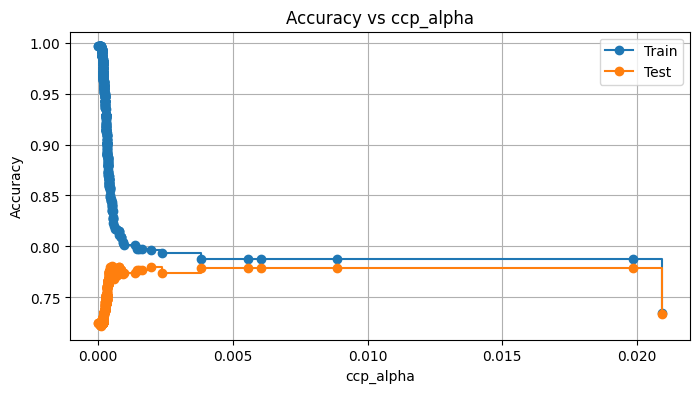

In [35]:
# Plot accuracy vs alpha
plt.figure(figsize=(8,4))
plt.plot(alphas, train_acc, marker='o', drawstyle='steps-post', label='Train')
plt.plot(alphas, test_acc,  marker='o', drawstyle='steps-post', label='Test')
plt.xlabel('ccp_alpha'); plt.ylabel('Accuracy')
plt.title('Accuracy vs ccp_alpha'); plt.legend()
plt.grid(True); plt.show()

In [36]:
# Select best alpha on test set
best_idx = test_acc.index(max(test_acc))
best_alpha = alphas[best_idx]

# Final pruned model
pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
pruned.fit(X_train, y_train)
y_tr_post = pruned.predict(X_train)
y_te_post = pruned.predict(X_test)

post_train_acc = accuracy_score(y_train, y_tr_post)
post_test_acc  = accuracy_score(y_test,  y_te_post)

print("Post-Pruned (ccp_alpha = %.5f)" % best_alpha)
print(f"Train accuracy: {post_train_acc:.4f}")
print(f"Test  accuracy: {post_test_acc:.4f}")
print("\nClassification report on test set:")
print(classification_report(y_test, y_te_post))

Post-Pruned (ccp_alpha = 0.00052)
Train accuracy: 0.8350
Test  accuracy: 0.7806

Classification report on test set:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1549
           1       0.63      0.42      0.51       561

    accuracy                           0.78      2110
   macro avg       0.72      0.67      0.68      2110
weighted avg       0.76      0.78      0.77      2110

